### Edgar Moises Hernandez-Gonzalez
#### 27/11/19-11/02/20
#### Clasificacion de imagenes motoras en EEG con LSTM o GRU
##### Caracteristicas = alfa de C3 y C4
##### 5 ejecuciones independientes

#### LSTM
##### Sujeto 1
##### Accuracy = 26.39%
##### Kappa = 0.0185

#### GRU
##### Sujeto 1
##### Accuracy = 24.31%
##### Kappa = 0

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 2, 255))
x_test = x_test.reshape((n_samples_test, 2, 255))

print(x_train.shape)
print(x_test.shape)

(288, 2, 255)
(288, 2, 255)


In [0]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 255, 2)
(288, 255, 2)


In [0]:
def RNN_LSTM():
  model = Sequential()
  model.add(LSTM(32, input_shape=x_train.shape[1:]))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))
    
  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
def RNN_GRU():
  model = Sequential()
  model.add(GRU(32, input_shape=x_train.shape[1:]))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Train on 288 samples, validate on 288 samples
Epoch 1/40
288/288 - 6s - loss: 1.3856 - acc: 0.2326 - val_loss: 1.3906 - val_acc: 0.2743
Epoch 2/40
288/288 - 6s - loss: 1.3772 - acc: 0.2847 - val_loss: 1.3907 - val_acc: 0.2743
Epoch 3/40
288/288 - 5s - loss: 1.3827 - acc: 0.2535 - val_loss: 1.3907 - val_acc: 0.2708
Epoch 4/40
288/288 - 6s - loss: 1.3891 - acc: 0.2604 - val_loss: 1.3907 - val_acc: 0.2778
Epoch 5/40
288/288 - 6s - loss: 1.3889 - acc: 0.2222 - val_loss: 1.3908 - val_acc: 0.2743
Epoch 6/40
288/288 - 6s - loss: 1.3879 - acc: 0.2639 - val_loss: 1.3908 - val_acc: 0.2708
Epoch 7/40
288/288 - 6s - loss: 1.3830 - acc: 0.2917 - val_loss: 1.3909 - val_acc: 0.2708
Epoch 8/40
288/288 - 5s - loss: 1.3838 - acc: 0.2882 - val_loss: 1.3910 - val_acc: 0.2569
Epoch 9/40
288/288 - 6s - loss: 1.3843 - acc: 0.2778 - val_loss: 1.3910 - val_acc: 0.2569
Epoch 10/40
288/288 - 6s - loss: 1.3805 - acc: 0.2778 - val_loss: 1.3911 - val_acc: 0.2535
Epoch 11/40
288/288 - 6s - loss: 1.3881 

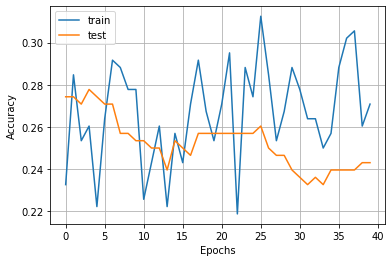

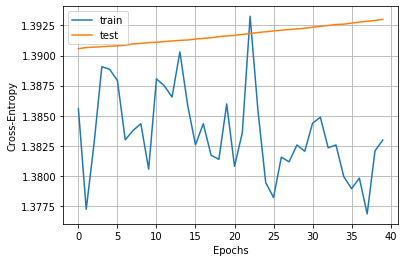


Resultados:
loss: [1.3930085897445679]
accuracy: [0.24305555]
kappa: [-0.0092592592592593]
f1: [0.18996103067327075]


In [0]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(3):
    print("Iteration:", i+1);
    
    model = RNN_GRU()

    history = model.fit(x_train, y_train, epochs=40, batch_size=18,
                        validation_data=(x_test, y_test), verbose=2)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                3360      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 3,492
Trainable params: 3,492
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.2431
Mean Kappa: -0.0093
Mean F1: 0.1900
Max Accuracy: 0.2431
Max Kappa: -0.0093
Max F1: 0.1900
